In [1]:
options(stringsAsFactors = FALSE, warn = -1,
        repr.plot.res = 200,
        repr.plot.width=8, repr.plot.height=4.5)

## install devtools if not installed
if(!("devtools" %in% rownames(installed.packages()))){
  install.packages("devtools",  repos = c(CRAN = "http://cran.rstudio.com"))
  }

## install bmetenrichr if not installed
if(!("bmetenrichr" %in% rownames(installed.packages()))){
   devtools::install_github(repo = "martijnmolenaar/bmetenrichr")
}


In [3]:
library(bmetenrichr)

## simple anlayses using LION

In [4]:
## load example data 
data("Rappez_et_al")

In [5]:
## example sc_matrix
## is SpaceM dataset from Rappez et al. (2022) Nat. Methods.

Rappez_et_al$sc_matrix[1:10,1:10]

,8,15,18,25,27,29,35,38,41,47
C10H10N4O.K,0.01145815,0.0000000,0.00000000,0.00000000,0.00000000,0.008558847,0.000000000,0.00000000,0.000000000,0.000000000
C10H10O6.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.006726224
C10H11N4O7P.Na,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.005782876,0.02968958,0.000000000,0.000000000
C10H11N5O3.H,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClN5O3.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClN5O3.Na,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClNO4.H,0.01707534,0.0620677,0.05203464,0.01376432,0.02417577,0.028755533,0.030977567,0.03611660,0.009692678,0.031959898
C10H12ClNO4.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClNO4.Na,0.17496077,0.1702377,0.17311070,0.16992632,0.01635700,0.174631645,0.147417684,0.12427280,0.160955912,0.120047020
C10H12FN5O4.H,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000


In [7]:
## example annotations
rownames(Rappez_et_al$sc_matrix)[1:10]

[1] "C10H10N4O.K"     "C10H10O6.K"      "C10H11N4O7P.Na"  "C10H11N5O3.H"   
 [5] "C10H12ClN5O3.K"  "C10H12ClN5O3.Na" "C10H12ClNO4.H"   "C10H12ClNO4.K"  
 [9] "C10H12ClNO4.Na"  "C10H12FN5O4.H"

In [8]:
## conditions in example
Rappez_et_al$conditions[1:10]

[1] "F" "F" "F" "F" "F" "F" "F" "F" "F" "F"

In [9]:
## should the annotations be included in the analysis? 
Rappez_et_al$cellular[1:10]

C10H10N4O.K      C10H10O6.K  C10H11N4O7P.Na    C10H11N5O3.H  C10H12ClN5O3.K 
          FALSE           FALSE           FALSE            TRUE           FALSE 
C10H12ClN5O3.Na   C10H12ClNO4.H   C10H12ClNO4.K  C10H12ClNO4.Na   C10H12FN5O4.H 
          FALSE           FALSE           FALSE           FALSE           FALSE

In [10]:
## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix,
                 annotations = rownames(Rappez_et_al$sc_matrix),
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular,
                 condition.x = "U",
                 condition.y = "F"                    )


Parsing isomers...
single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: U 
condition.y: F 


In [11]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 19 (1.73%)



In [12]:
## perform enrichment analysis with n = 100 bootstraps

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


35.43% of annotations were matched to pathway




Perform enrichment analysis...


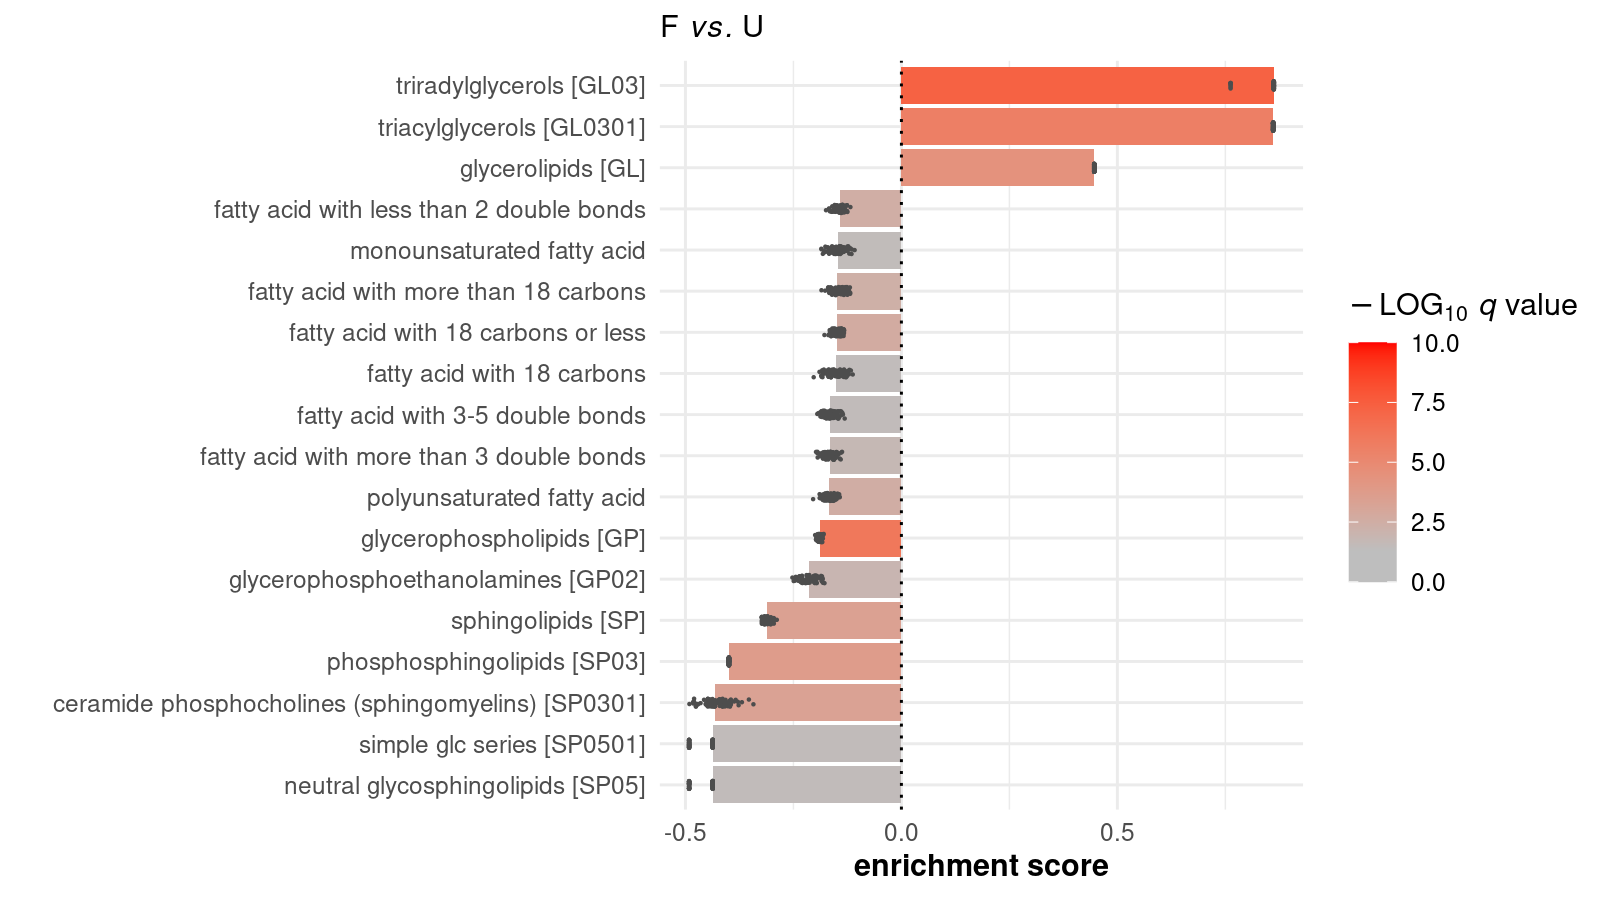

In [13]:
## plot enrichment analysis, with enrichment score (ES) on x-axis

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, by.statistic = "ES")

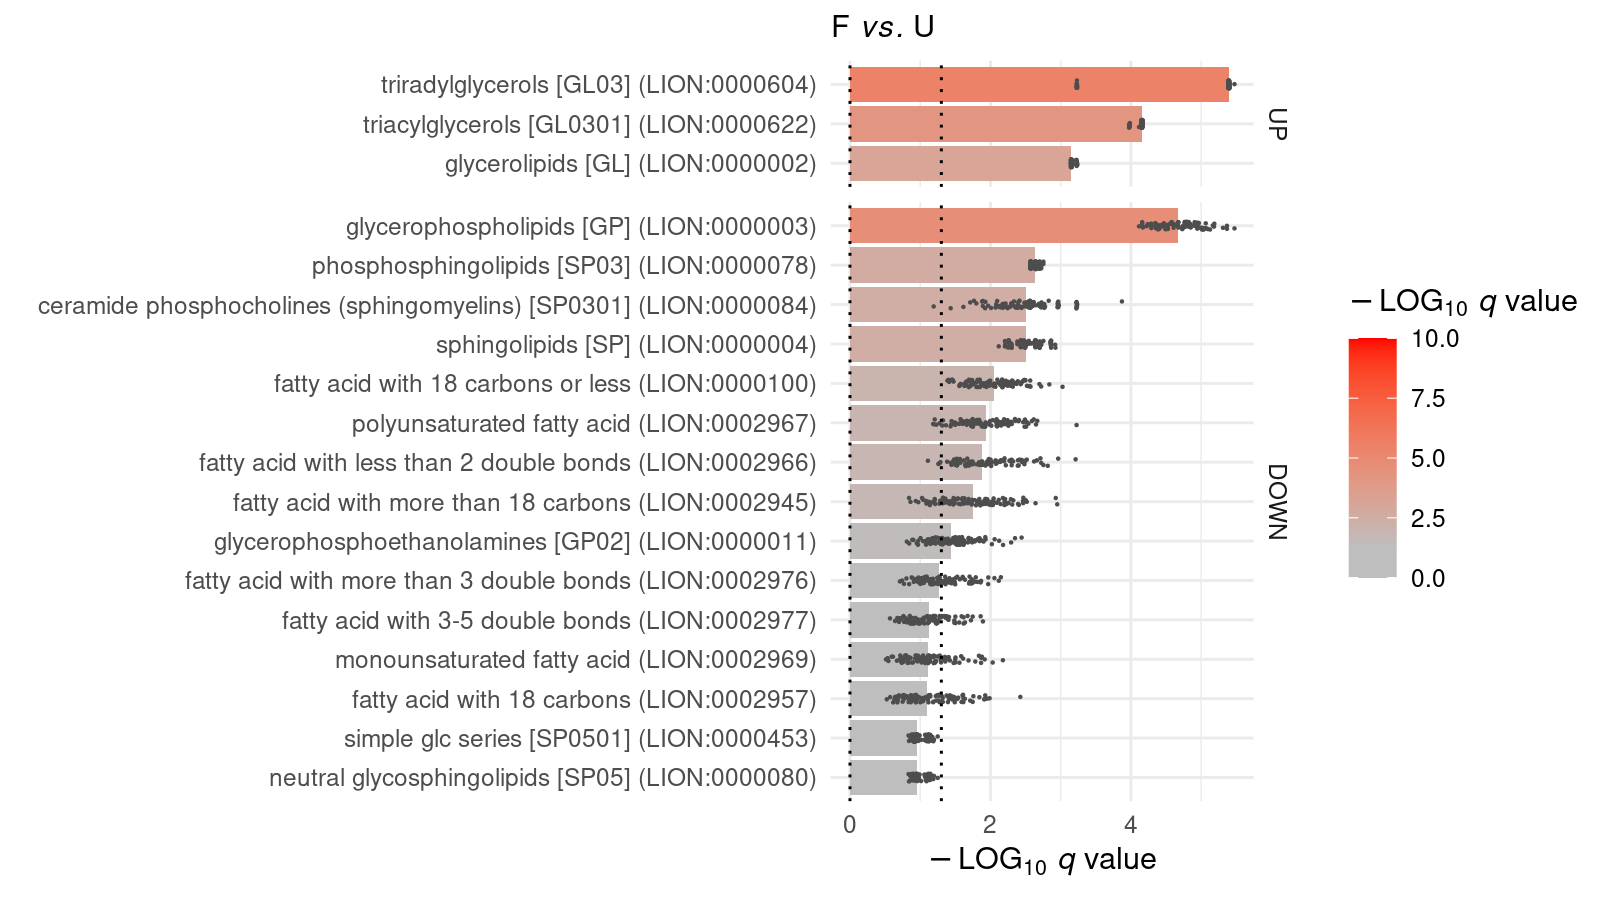

In [14]:
## plot enrichment analysis, now with q.values on x-axis, and with LION IDs

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, plotIDs = T, by.statistic = "q.value")

In [15]:
## export enrichment table

enrichmentTable(myTestRun)

LION_ID,LION_name,n,ES_median,ES_sd,p.value_median,p.value_sd,q.value_median,q.value_sd,fraction.bootstrap.presence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LION:0000604,triradylglycerols [GL03],9.0,0.8622590,0.0273005112,4.596620e-08,5.450554e-06,4.045026e-06,1.593667e-04,1.00
LION:0000003,glycerophospholipids [GP],291.0,-0.1896115,0.0039763221,4.214191e-07,4.197243e-07,2.102835e-05,1.710418e-05,1.00
LION:0000622,triacylglycerols [GL0301],7.0,0.8606783,0.0000000000,2.380995e-06,0.000000e+00,6.984253e-05,9.623462e-06,1.00
LION:0000002,glycerolipids [GL],28.0,0.4463952,0.0000000000,3.787071e-05,0.000000e+00,7.046016e-04,3.551990e-05,1.00
LION:0000078,phosphosphingolipids [SP03],30.0,-0.3992509,0.0000000000,1.823436e-04,0.000000e+00,2.292319e-03,2.590537e-04,1.00
LION:0000084,ceramide phosphocholines (sphingomyelins) [SP0301],24.0,-0.4316684,0.0291164851,2.513278e-04,1.312726e-03,3.105694e-03,8.035283e-03,1.00
LION:0000004,sphingolipids [SP],49.0,-0.3102381,0.0077343617,2.908494e-04,1.480756e-04,3.162987e-03,1.339734e-03,1.00
LION:0000100,fatty acid with 18 carbons or less,206.0,-0.1497686,0.0089205076,1.085229e-03,1.334274e-03,8.986310e-03,9.264999e-03,1.00
LION:0002967,polyunsaturated fatty acid,150.0,-0.1676314,0.0116820324,1.492939e-03,2.256407e-03,1.167645e-02,1.467843e-02,1.00


In [16]:
## now, let's test FIT vs F

myTestRun <-  setConditions(object = myTestRun, condition.x = 'F', condition.y = 'FIT')
myTestRun

single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: F 
condition.y: FIT 

In [17]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 24 (2.19%)



In [18]:

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


15.72% of annotations were matched to pathway




Perform enrichment analysis...


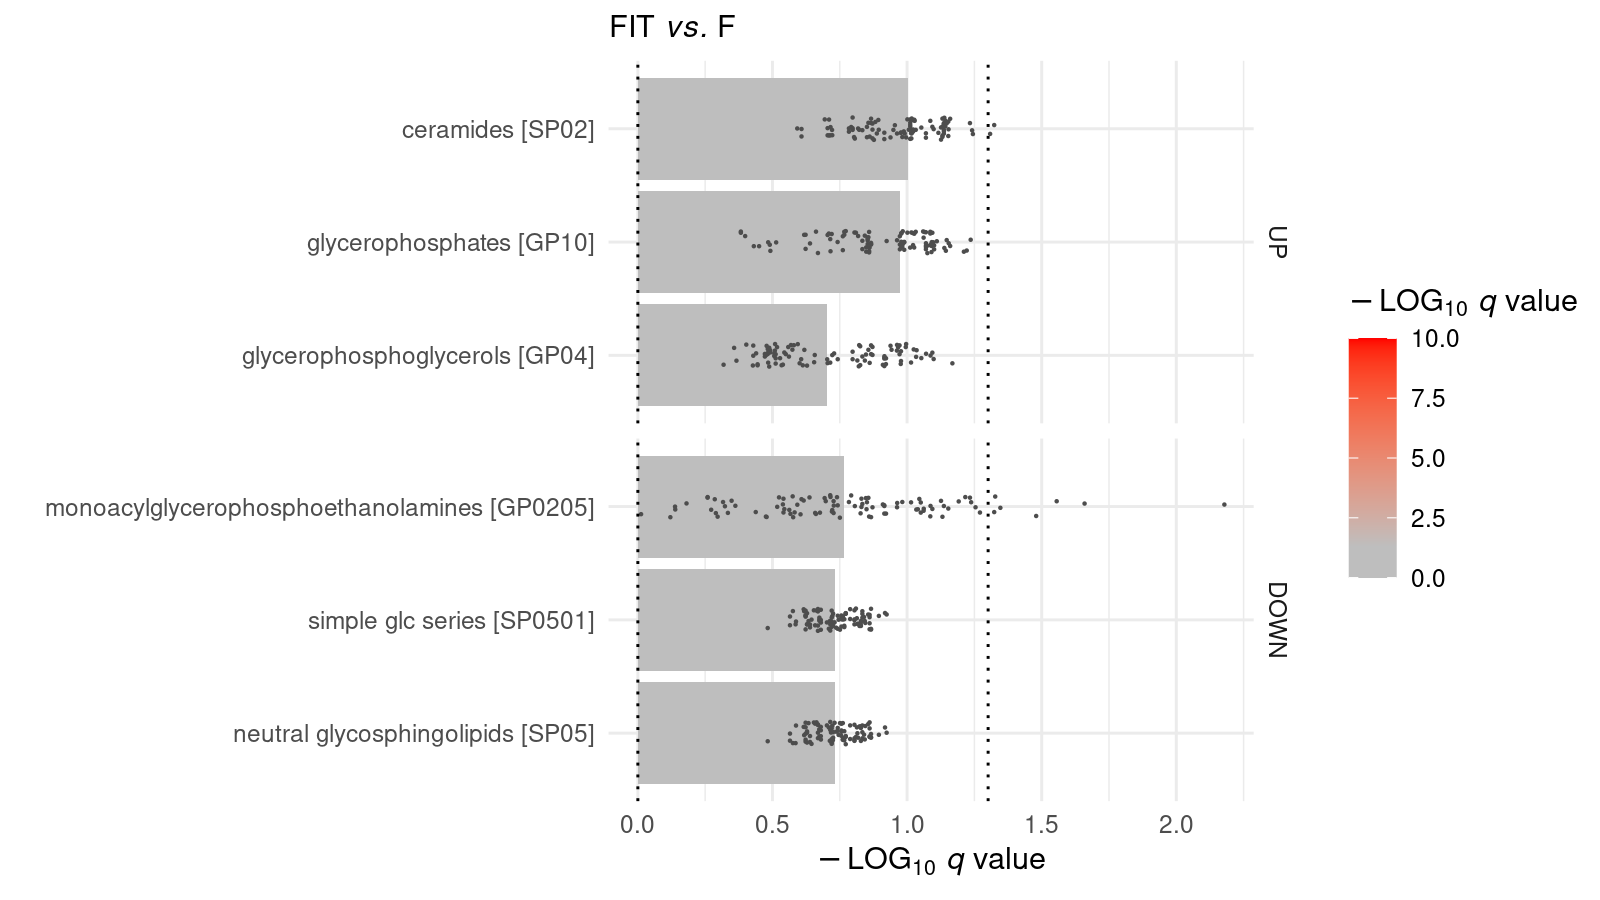

In [19]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05)

## run LION enrichment with including isobars

In [ ]:
## it's possible to expand the analysis by including isobars (by default, only isomers are included)
## isobars are predicted under the hood, no specific data is required
## except:
##  - for polarization_mode ('positive' or 'negative')
##  - mass_range_ppm

## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix, 
                 isobars = TRUE,                      ## to include isobars (default is FALSE)
                 mass_range_ppm = 3,                  ## mass range to define isobars
                 polarization_mode = "positive",      ## mode, is important to include the right adducts
                 annotations = rownames(Rappez_et_al$sc_matrix), 
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular,
                 condition.x = "U",
                 condition.y = "F"                    )

polarization_mode is: positive



In [ ]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

In [ ]:
## perform enrichment analysis with n = 100 bootstraps

myTestRun <- calcEnrichment(myTestRun, n = 100)

In [ ]:
## example of the annotations, that now also include isobars

myTestRun$annotations[sample(which(sapply(myTestRun$isobars_list, length) > 1), size = 1)]

In [ ]:
## plot enrichment analysis, with q.values on x-axis, and with LION IDs

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, plotIDs = T, by.statistic = "q.value")

## custom analyses

In [ ]:
## it's possible to use a custom metabolite set enrichment pathway
## this should be formatted as a names list, with each element a vector of the metabolites within the set

myPathway <- myTestRun$pathway_list[sample(100, size = 20)]

str(myPathway)

In [ ]:
## also, custom annotations can be provided as list
my_annotations <- myTestRun$annotations
str(my_annotations[825:829])

In [ ]:
## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix, 
                 pathway = myPathway, 
                 termsOfInterest = "all",   ## to include 'all' terms
                 annotations = my_annotations,
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular, 
                 condition.x = "U",
                 condition.y = "F"                    )

In [ ]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

In [ ]:

myTestRun <- calcEnrichment(myTestRun, n = 20)

In [ ]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05)

In [ ]:
## export enrichment table

enrichmentTable(myTestRun)